In [ ]:
import yfinance as yf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Multiply, Permute, Flatten, Activation, Lambda, Attention
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTING DATA

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/deep learning/SOLUSDT-5m-2020-08.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/deep learning/SOLUSDT-5m-2023-11.csv')
test_dataset2 = pd.read_csv('/content/drive/MyDrive/deep learning/SOLUSDT-5m-2023-08.csv')
test_dataset3 = pd.read_csv('/content/drive/MyDrive/deep learning/SOLUSDT-5m-2024-03.csv')

In [ ]:
new_header = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'ignore']  # replace with actual column names

train_dataset.columns = new_header
test_dataset.columns = new_header
test_dataset2.columns = new_header
test_dataset3.columns = new_header

In [ ]:
print(train_dataset.head())

       open_time    open    high     low   close   volume     close_time  \
0  1597125900000  3.1846  3.4700  3.1846  3.1846  2282.99  1597126199999   
1  1597126200000  3.1655  3.1655  3.1655  3.1655   104.97  1597126499999   
2  1597126500000  3.1655  3.3564  3.1358  3.3564   237.93  1597126799999   
3  1597126800000  3.1993  3.3564  3.1500  3.1500  2308.50  1597127099999   
4  1597127100000  3.1360  3.1360  3.1360  3.1360   266.68  1597127399999   

   quote_volume  count  taker_buy_volume  taker_buy_quote_volume  ignore  
0   7313.194759     34           1162.73             3737.175189       0  
1    332.282535      2              0.00                0.000000       0  
2    782.552151      8             30.00              100.692000       0  
3   7428.434468     23           1985.96             6410.516452       0  
4    836.308480      8            106.68              334.548480       0  


In [ ]:
print(test_dataset.head())

       open_time   open   high    low  close    volume     close_time  \
0  1698797100000  38.19  38.36  38.16  38.20  37655.19  1698797399999   
1  1698797400000  38.19  38.21  38.13  38.18  35492.71  1698797699999   
2  1698797700000  38.17  38.22  38.12  38.17  25778.49  1698797999999   
3  1698798000000  38.17  38.29  37.93  37.99  50606.31  1698798299999   
4  1698798300000  38.00  38.06  37.90  38.02  28785.19  1698798599999   

   quote_volume  count  taker_buy_volume  taker_buy_quote_volume  ignore  
0  1.440564e+06   1991          19356.72             740518.0289       0  
1  1.354495e+06   1631           8905.38             339895.1898       0  
2  9.840173e+05   1268          10693.57             408213.9978       0  
3  1.928157e+06   2676          23086.81             880182.6440       0  
4  1.093509e+06   1515          13161.37             500048.4996       0  


In [ ]:
print(train_dataset.describe())

          open_time          open          high           low         close  \
count  2.377700e+04  23777.000000  23777.000000  23777.000000  23777.000000   
mean   1.633144e+12     37.905981     38.023865     37.787036     37.908626   
std    2.450893e+10     26.224209     26.336957     26.110346     26.228128   
min    1.597126e+12      2.750000      2.767000      2.743100      2.750000   
25%    1.598909e+12      4.679700      4.705100      4.655600      4.686200   
50%    1.629566e+12     38.653000     38.750000     38.579000     38.650000   
75%    1.660207e+12     44.080000     44.170000     43.993000     44.080000   
max    1.661990e+12    129.640000    130.110000    128.500000    129.640000   

              volume    close_time  quote_volume         count  \
count   23777.000000  2.377700e+04  2.377700e+04  23777.000000   
mean    13829.907411  1.633144e+12  7.351689e+05   1435.466459   
std     20220.655903  2.450893e+10  1.576485e+06   2996.609277   
min         0.000000  1.

In [ ]:
train_dataset['open_time'] = pd.to_datetime(train_dataset['open_time'], unit='ms')

In [ ]:
train_dataset['close_time'] = pd.to_datetime(train_dataset['close_time'], unit='ms')

In [ ]:
test_dataset['open_time'] = pd.to_datetime(test_dataset['open_time'], unit='ms')
test_dataset['close_time'] = pd.to_datetime(test_dataset['close_time'], unit='ms')

In [ ]:
test_dataset2['open_time'] = pd.to_datetime(test_dataset2['open_time'], unit='ms')
test_dataset2['close_time'] = pd.to_datetime(test_dataset2['close_time'], unit='ms')

In [ ]:
test_dataset3['open_time'] = pd.to_datetime(test_dataset3['open_time'], unit='ms')
test_dataset3['close_time'] = pd.to_datetime(test_dataset3['close_time'], unit='ms')

In [ ]:
print(test_dataset)

               open_time   open   high    low  close    volume  \
0    2023-11-01 00:05:00  38.19  38.36  38.16  38.20  37655.19   
1    2023-11-01 00:10:00  38.19  38.21  38.13  38.18  35492.71   
2    2023-11-01 00:15:00  38.17  38.22  38.12  38.17  25778.49   
3    2023-11-01 00:20:00  38.17  38.29  37.93  37.99  50606.31   
4    2023-11-01 00:25:00  38.00  38.06  37.90  38.02  28785.19   
...                  ...    ...    ...    ...    ...       ...   
8634 2023-11-30 23:35:00  59.14  59.15  59.05  59.13   9943.73   
8635 2023-11-30 23:40:00  59.12  59.24  59.10  59.21  10418.43   
8636 2023-11-30 23:45:00  59.20  59.28  59.13  59.25   9093.09   
8637 2023-11-30 23:50:00  59.25  59.26  59.16  59.23   7345.34   
8638 2023-11-30 23:55:00  59.24  59.31  59.19  59.30   8782.49   

                  close_time  quote_volume  count  taker_buy_volume  \
0    2023-11-01 00:09:59.999  1.440564e+06   1991          19356.72   
1    2023-11-01 00:14:59.999  1.354495e+06   1631           8905.

In [ ]:
print(test_dataset.describe())

                 open_time         open         high          low  \
count                 8639  8639.000000  8639.000000  8639.000000   
mean   2023-11-16 00:00:00    52.748597    52.899448    52.592610   
min    2023-11-01 00:05:00    37.930000    37.940000    37.810000   
25%    2023-11-08 12:02:30    43.410000    43.510000    43.300000   
50%    2023-11-16 00:00:00    56.280000    56.440000    56.110000   
75%    2023-11-23 11:57:30    58.390000    58.510000    58.260000   
max    2023-11-30 23:55:00    67.980000    68.200000    67.680000   
std                    NaN     7.809729     7.830461     7.787439   

             close         volume                     close_time  \
count  8639.000000    8639.000000                           8639   
mean     52.750881   30801.394316  2023-11-16 00:04:59.999000064   
min      37.920000    1477.750000     2023-11-01 00:09:59.999000   
25%      43.410000   12544.310000  2023-11-08 12:07:29.999000064   
50%      56.280000   21398.220000  202

In [ ]:
print(test_dataset2.describe())

                 open_time         open         high          low  \
count                 8927  8927.000000  8927.000000  8927.000000   
mean   2023-08-16 12:00:00    22.515569    22.542816    22.486246   
min    2023-08-01 00:05:00    19.570000    19.670000    19.350000   
25%    2023-08-08 18:02:30    21.060000    21.085000    21.030000   
50%    2023-08-16 12:00:00    22.750000    22.780000    22.720000   
75%    2023-08-24 05:57:30    23.765000    23.800000    23.730000   
max    2023-08-31 23:55:00    25.290000    25.420000    25.230000   
std                    NaN     1.537955     1.538225     1.538334   

             close         volume                     close_time  \
count  8927.000000    8927.000000                           8927   
mean     22.515080   10283.071912  2023-08-16 12:04:59.999000064   
min      19.570000      11.190000     2023-08-01 00:09:59.999000   
25%      21.060000    2800.725000  2023-08-08 18:07:29.999000064   
50%      22.750000    5104.400000  202

In [ ]:
print(test_dataset3.describe())

                 open_time         open         high          low  \
count                 8927  8927.000000  8927.000000  8927.000000   
mean   2024-03-16 12:00:00   165.798624   166.237633   165.349783   
min    2024-03-01 00:05:00   117.350000   119.810000   105.000000   
25%    2024-03-08 18:02:30   144.875000   145.090000   144.550000   
50%    2024-03-16 12:00:00   173.120000   173.620000   172.600000   
75%    2024-03-24 05:57:30   187.215000   187.675000   186.750000   
max    2024-03-31 23:55:00   209.740000   210.180000   208.970000   
std                    NaN    24.438398    24.494530    24.395183   

             close         volume                     close_time  \
count  8927.000000    8927.000000                           8927   
mean    165.807813   27562.566418  2024-03-16 12:04:59.999000064   
min     117.350000    1794.270000     2024-03-01 00:09:59.999000   
25%     144.870000   10607.500000  2024-03-08 18:07:29.999000064   
50%     173.120000   19031.750000  202

In [ ]:
print(train_dataset.describe())

                           open_time          open          high  \
count                          23777  23777.000000  23777.000000   
mean   2021-10-02 03:00:46.444042240     37.905981     38.023865   
min              2020-08-11 06:05:00      2.750000      2.767000   
25%              2020-08-31 21:25:00      4.679700      4.705100   
50%              2021-08-21 17:15:00     38.653000     38.750000   
75%              2022-08-11 08:35:00     44.080000     44.170000   
max              2022-08-31 23:55:00    129.640000    130.110000   
std                              NaN     26.224209     26.336957   

                low         close         volume  \
count  23777.000000  23777.000000   23777.000000   
mean      37.787036     37.908626   13829.907411   
min        2.743100      2.750000       0.000000   
25%        4.655600      4.686200    4096.130000   
50%       38.579000     38.650000    7780.990000   
75%       43.993000     44.080000   15399.797000   
max      128.500000    

In [ ]:
train_dataset = train_dataset[['open', 'high', 'low', 'close', 'volume']]
test_dataset = test_dataset[['open', 'high', 'low', 'close', 'volume']]
test_dataset2 = test_dataset2[['open', 'high', 'low', 'close', 'volume']]
test_dataset3 = test_dataset3[['open', 'high', 'low', 'close', 'volume']]

In [ ]:
print(train_dataset)

          open     high      low    close    volume
0       3.1846   3.4700   3.1846   3.1846   2282.99
1       3.1655   3.1655   3.1655   3.1655    104.97
2       3.1655   3.3564   3.1358   3.3564    237.93
3       3.1993   3.3564   3.1500   3.1500   2308.50
4       3.1360   3.1360   3.1360   3.1360    266.68
...        ...      ...      ...      ...       ...
23772  31.2500  31.3100  31.2200  31.2600   7148.67
23773  31.2700  31.3300  31.2100  31.3300   9407.72
23774  31.3300  31.4900  31.3200  31.4100  14913.91
23775  31.4100  31.5200  31.4100  31.4700   6139.80
23776  31.4700  31.5200  31.4500  31.5000   3435.75

[23777 rows x 5 columns]


In [ ]:
print(test_dataset)

       open   high    low  close    volume
0     38.19  38.36  38.16  38.20  37655.19
1     38.19  38.21  38.13  38.18  35492.71
2     38.17  38.22  38.12  38.17  25778.49
3     38.17  38.29  37.93  37.99  50606.31
4     38.00  38.06  37.90  38.02  28785.19
...     ...    ...    ...    ...       ...
8634  59.14  59.15  59.05  59.13   9943.73
8635  59.12  59.24  59.10  59.21  10418.43
8636  59.20  59.28  59.13  59.25   9093.09
8637  59.25  59.26  59.16  59.23   7345.34
8638  59.24  59.31  59.19  59.30   8782.49

[8639 rows x 5 columns]


In [ ]:
print(test_dataset2)

       open   high    low  close    volume
0     23.70  23.70  23.59  23.66  14283.06
1     23.66  23.74  23.65  23.74  12895.14
2     23.74  23.76  23.71  23.75   4234.83
3     23.74  23.81  23.74  23.78   5957.77
4     23.77  23.83  23.77  23.83   9189.76
...     ...    ...    ...    ...       ...
8922  19.74  19.77  19.74  19.75   1709.32
8923  19.76  19.76  19.74  19.76   1618.06
8924  19.75  19.75  19.71  19.72   5554.12
8925  19.73  19.74  19.71  19.74   1649.78
8926  19.74  19.74  19.72  19.74   1843.80

[8927 rows x 5 columns]


In [ ]:
print(test_dataset3)

        open    high     low   close    volume
0     126.32  127.15  126.32  127.15  30178.00
1     127.15  127.98  127.07  127.44  32221.20
2     127.44  129.00  127.20  128.79  70536.13
3     128.79  129.02  128.12  128.97  44189.93
4     128.97  129.40  128.63  128.74  42722.18
...      ...     ...     ...     ...       ...
8922  202.81  203.17  202.51  202.87  22900.69
8923  202.87  203.15  202.56  203.00  15696.22
8924  203.01  203.11  202.28  202.75  17957.64
8925  202.76  202.78  202.29  202.55   9335.44
8926  202.54  203.12  202.44  202.45  12098.87

[8927 rows x 5 columns]


In [ ]:
print(train_dataset.describe())

               open          high           low         close         volume
count  23777.000000  23777.000000  23777.000000  23777.000000   23777.000000
mean      37.905981     38.023865     37.787036     37.908626   13829.907411
std       26.224209     26.336957     26.110346     26.228128   20220.655903
min        2.750000      2.767000      2.743100      2.750000       0.000000
25%        4.679700      4.705100      4.655600      4.686200    4096.130000
50%       38.653000     38.750000     38.579000     38.650000    7780.990000
75%       44.080000     44.170000     43.993000     44.080000   15399.797000
max      129.640000    130.110000    128.500000    129.640000  347960.155000


## PREPROCESSING DATA

In [ ]:
null_values = train_dataset.isnull().sum()

print(null_values)

open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [ ]:
print(train_dataset.dtypes)

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


In [ ]:
features = ["open", "high", "low", "close", "volume"]

In [ ]:
train_data = train_dataset[features].values
test_data = test_dataset[features].values
test_data2 = test_dataset2[features].values
test_data3 = test_dataset3[features].values

In [ ]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)
test_data_scaled2 = scaler.transform(test_data2)
test_data_scaled3 = scaler.transform(test_data3)

In [ ]:
def create_time_series(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

## TEST SET

In [ ]:
time_steps = 6
X_train, y_train = create_time_series(train_data_scaled, time_steps)
X_test, y_test = create_time_series(test_data_scaled, time_steps)

In [ ]:
X_test2, y_test2 = create_time_series(test_data_scaled2, time_steps)
X_test3, y_test3 = create_time_series(test_data_scaled3, time_steps)

In [ ]:
print(X_test)

[[[0.27929703 0.27950496 0.28162987 0.27937584 0.10821696]
  [0.27929703 0.27832704 0.28139132 0.27921822 0.10200222]
  [0.27913941 0.27840557 0.2813118  0.27913941 0.0740846 ]
  [0.27913941 0.27895526 0.27980095 0.27772086 0.14543708]
  [0.27779967 0.27714912 0.27956239 0.27795729 0.08272554]
  [0.27787848 0.27785587 0.28019854 0.27882418 0.08209541]]

 [[0.27929703 0.27832704 0.28139132 0.27921822 0.10200222]
  [0.27913941 0.27840557 0.2813118  0.27913941 0.0740846 ]
  [0.27913941 0.27895526 0.27980095 0.27772086 0.14543708]
  [0.27779967 0.27714912 0.27956239 0.27795729 0.08272554]
  [0.27787848 0.27785587 0.28019854 0.27882418 0.08209541]
  [0.27882418 0.27895526 0.28139132 0.27961226 0.08083762]]

 [[0.27913941 0.27840557 0.2813118  0.27913941 0.0740846 ]
  [0.27913941 0.27895526 0.27980095 0.27772086 0.14543708]
  [0.27779967 0.27714912 0.27956239 0.27795729 0.08272554]
  [0.27787848 0.27785587 0.28019854 0.27882418 0.08209541]
  [0.27882418 0.27895526 0.28139132 0.27961226 0.080

In [ ]:
num_elements = X_test.size
print("Number of elements:", num_elements)

Number of elements: 258990


In [ ]:
num_elements = y_test.size
print("Number of elements:", num_elements)

Number of elements: 43165


In [ ]:
print(y_train)

[[0.00197179 0.00195613 0.00181223 0.00193002 0.01090536]
 [0.00174955 0.00205586 0.00129059 0.0017062  0.00285444]
 [0.00199622 0.00185562 0.00181382 0.00199543 0.00056176]
 ...
 [0.22523446 0.22555618 0.22723922 0.22586492 0.04286097]
 [0.22586492 0.22579176 0.22795489 0.22633777 0.01764512]
 [0.22633777 0.22579176 0.22827296 0.2265742  0.00987398]]


In [ ]:
num_elements = y_train.size
print("Number of elements:", num_elements)

Number of elements: 118855


In [ ]:
print(X_train)

[[[0.00342501 0.00552052 0.00351074 0.00342501 0.00656107]
  [0.00327449 0.00312934 0.00335886 0.00327449 0.00030167]
  [0.00327449 0.00462844 0.00312269 0.00477894 0.00068379]
  [0.00354086 0.00462844 0.00323561 0.00315234 0.00663438]
  [0.003042   0.00289769 0.00312428 0.003042   0.00076641]
  [0.003042   0.00289769 0.00204522 0.00197257 0.01270197]]

 [[0.00327449 0.00312934 0.00335886 0.00327449 0.00030167]
  [0.00327449 0.00462844 0.00312269 0.00477894 0.00068379]
  [0.00354086 0.00462844 0.00323561 0.00315234 0.00663438]
  [0.003042   0.00289769 0.00312428 0.003042   0.00076641]
  [0.003042   0.00289769 0.00204522 0.00197257 0.01270197]
  [0.00197179 0.00195613 0.00181223 0.00193002 0.01090536]]

 [[0.00327449 0.00462844 0.00312269 0.00477894 0.00068379]
  [0.00354086 0.00462844 0.00323561 0.00315234 0.00663438]
  [0.003042   0.00289769 0.00312428 0.003042   0.00076641]
  [0.003042   0.00289769 0.00204522 0.00197257 0.01270197]
  [0.00197179 0.00195613 0.00181223 0.00193002 0.010

In [ ]:
num_elements = X_train.size
print("Number of elements:", num_elements)

Number of elements: 713130


## LSTM

In [ ]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model = Sequential()
model.add(LSTM(75, input_shape=(time_steps, len(features))))
model.add(Dense(len(features)))
model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
595/595 [==============================] - 8s 9ms/step - loss: 0.0013 - val_loss: 2.4364e-04 - lr: 0.0010
Epoch 2/20
595/595 [==============================] - 4s 7ms/step - loss: 4.0612e-04 - val_loss: 2.3873e-04 - lr: 0.0010
Epoch 3/20
595/595 [==============================] - 4s 7ms/step - loss: 3.9657e-04 - val_loss: 2.5826e-04 - lr: 0.0010
Epoch 4/20
595/595 [==============================] - 4s 7ms/step - loss: 3.8733e-04 - val_loss: 3.3367e-04 - lr: 0.0010
Epoch 5/20
595/595 [==============================] - 5s 8ms/step - loss: 3.9099e-04 - val_loss: 2.1683e-04 - lr: 0.0010
Epoch 6/20
595/595 [==============================] - 4s 6ms/step - loss: 3.8153e-04 - val_loss: 2.1756e-04 - lr: 0.0010
Epoch 7/20
595/595 [==============================] - 4s 6ms/step - loss: 3.7870e-04 - val_loss: 2.1602e-04 - lr: 0.0010
Epoch 8/20
595/595 [==============================] - 6s 9ms/step - loss: 3.7539e-04 - val_loss: 2.4671e-04 - lr: 0.0010
Epoch 9/20
595/595 [================

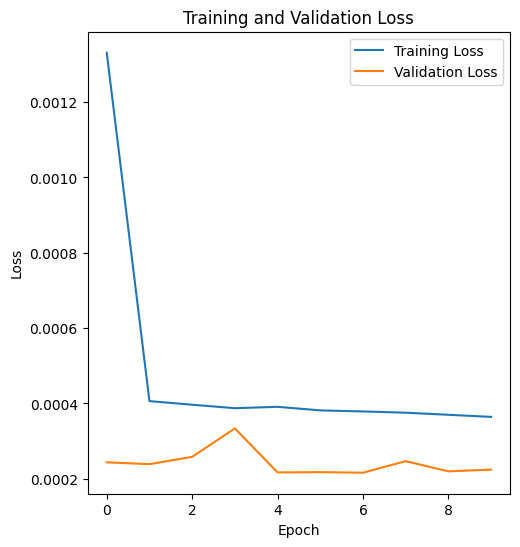

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)

270/270 [==============================] - 2s 6ms/step


In [ ]:
y_pred2 = model.predict(X_test2)

279/279 [==============================] - 1s 3ms/step


In [ ]:
y_pred3 = model.predict(X_test3)

279/279 [==============================] - 1s 3ms/step


In [ ]:
y_pred_denormalized = scaler.inverse_transform(y_pred)
y_test_denormalized = scaler.inverse_transform(y_test)

In [ ]:
y_pred_denormalized2 = scaler.inverse_transform(y_pred2)
y_test_denormalized2 = scaler.inverse_transform(y_test2)

In [ ]:
y_pred_denormalized3 = scaler.inverse_transform(y_pred3)
y_test_denormalized3 = scaler.inverse_transform(y_test3)

In [ ]:
print(y_pred_denormalized)

[[   37.834476    37.763496    38.164944    37.868496 28982.176   ]
 [   37.880466    37.8162      38.199963    37.92417  27918.33    ]
 [   37.94538     37.891083    38.23246     37.98199  29862.285   ]
 ...
 [   58.96966     58.857716    59.398335    58.990685 15647.917   ]
 [   58.990643    58.882244    59.46229     59.035107 14470.851   ]
 [   59.012966    58.901756    59.508503    59.065723 13225.341   ]]


In [ ]:
num_elements = y_pred_denormalized.size
print("Number of elements:", num_elements)

Number of elements: 43165


In [ ]:
print(y_test_denormalized)

[[   38.13    38.29    38.13    38.23 28128.27]
 [   38.24    38.36    38.14    38.24 33621.76]
 [   38.23    38.53    38.23    38.53 32449.12]
 ...
 [   59.2     59.28    59.13    59.25  9093.09]
 [   59.25    59.26    59.16    59.23  7345.34]
 [   59.24    59.31    59.19    59.3   8782.49]]


In [ ]:
num_elements = y_test_denormalized.size
print("Number of elements:", num_elements)

Number of elements: 43165


In [ ]:
print(y_test_denormalized2.size)

44605


In [ ]:
print(y_test_denormalized3.size)

44605


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

TEST SET 1

In [ ]:
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
rmse = np.sqrt(mean_squared_error(y_test_denormalized, y_pred_denormalized))
mda = np.mean(np.abs((y_test_denormalized - y_pred_denormalized) / y_test_denormalized)) * 100

In [ ]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MDA: {mda:.2f}%")

MAE: 2438.35
RMSE: 10350.09
MDA: 10.79%


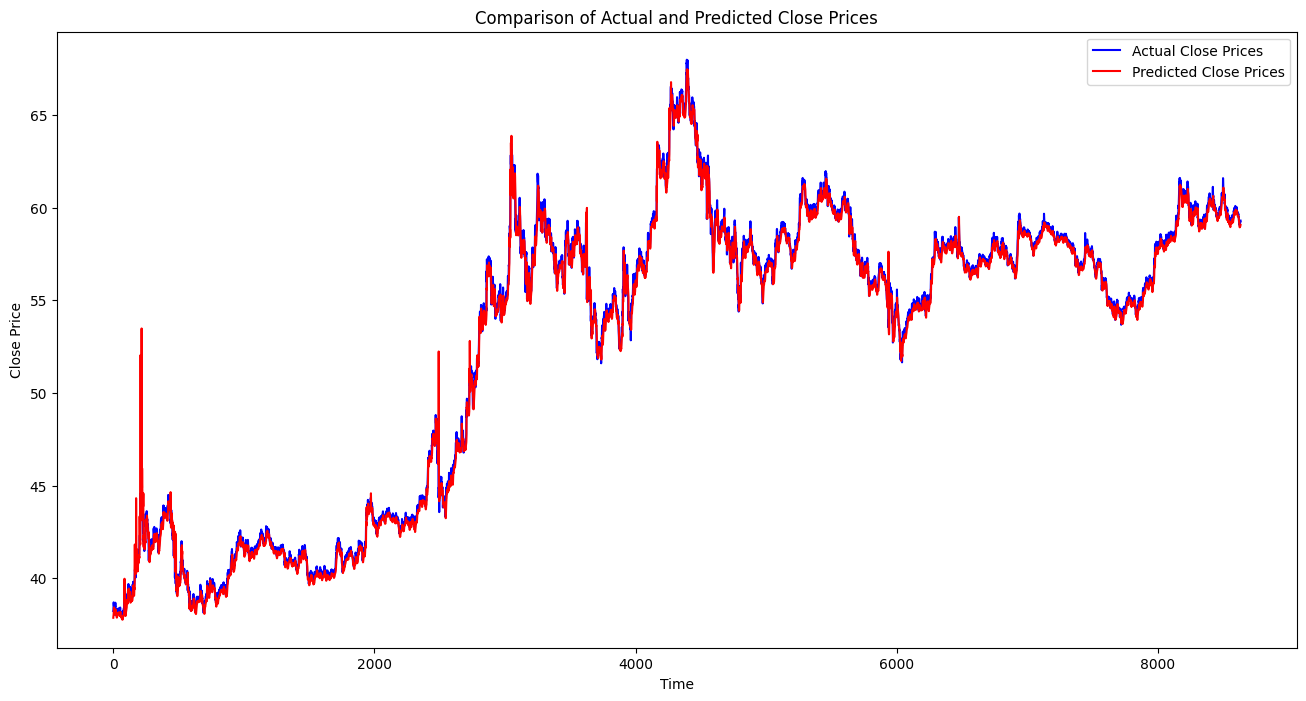

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_denormalized[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

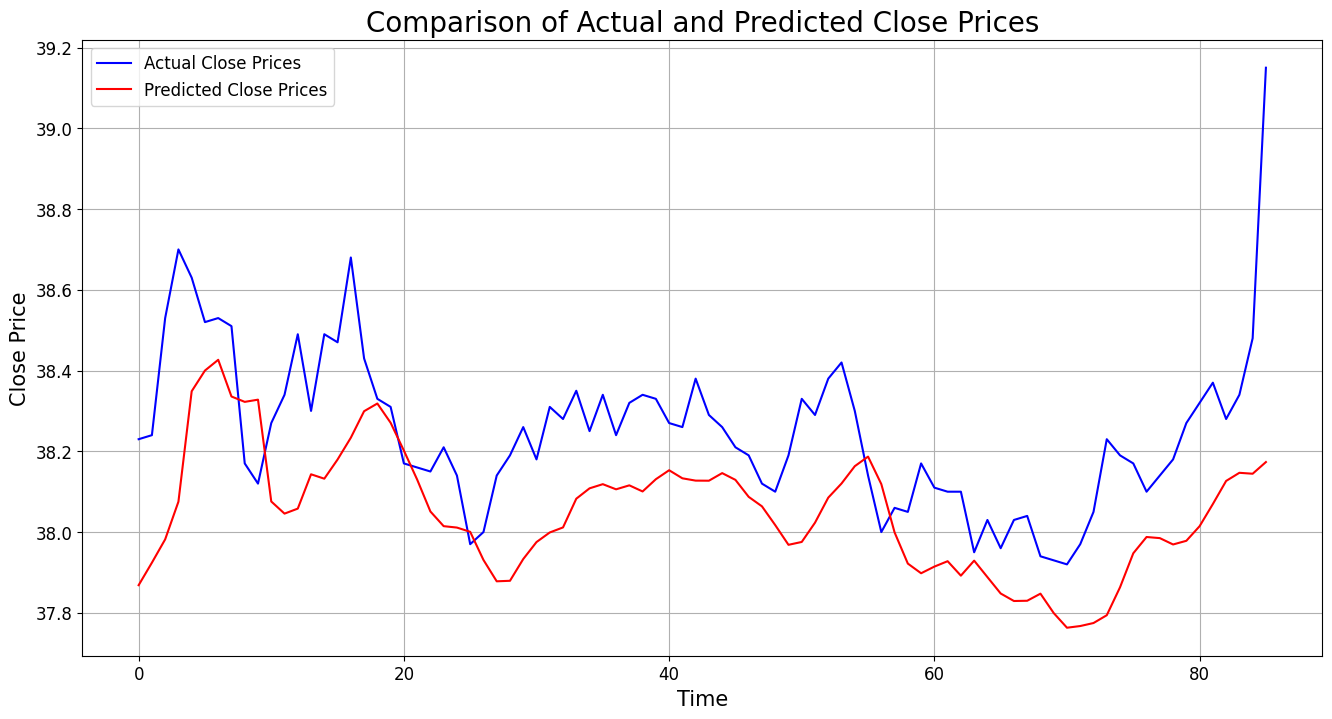

In [ ]:
data_length = len(y_test_denormalized)
num_points = max(1, int(data_length * 0.01))

y_test_denormalized = y_test_denormalized[:num_points]
y_pred_denormalized = y_pred_denormalized[:num_points]

plt.figure(figsize=(16, 8))

plt.plot(y_test_denormalized[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

TEST SET 2

In [ ]:
mae = mean_absolute_error(y_test_denormalized2, y_pred_denormalized2)
rmse = np.sqrt(mean_squared_error(y_test_denormalized2, y_pred_denormalized2))
mda = np.mean(np.abs((y_test_denormalized2 - y_pred_denormalized2) / y_test_denormalized2)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MDA: {mda:.2f}%")

MAE: 1557.52
RMSE: 7906.49
MDA: 36.37%


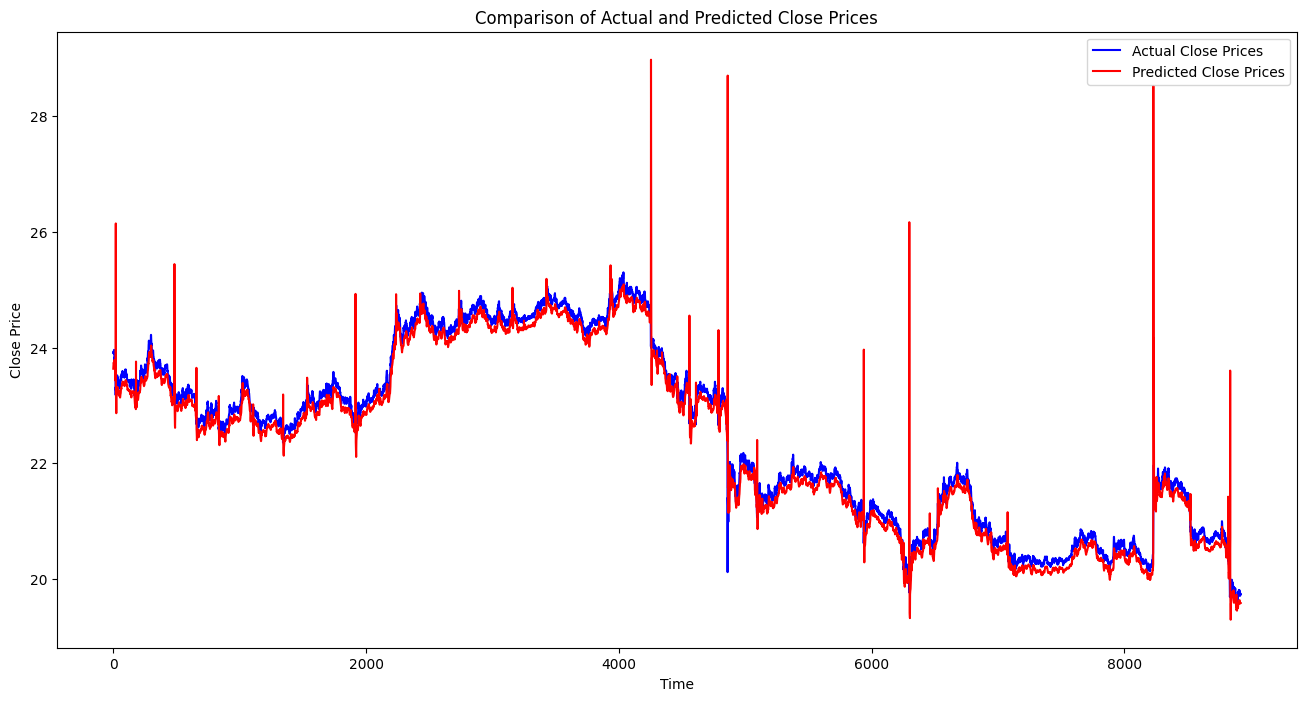

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_denormalized2[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized2[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


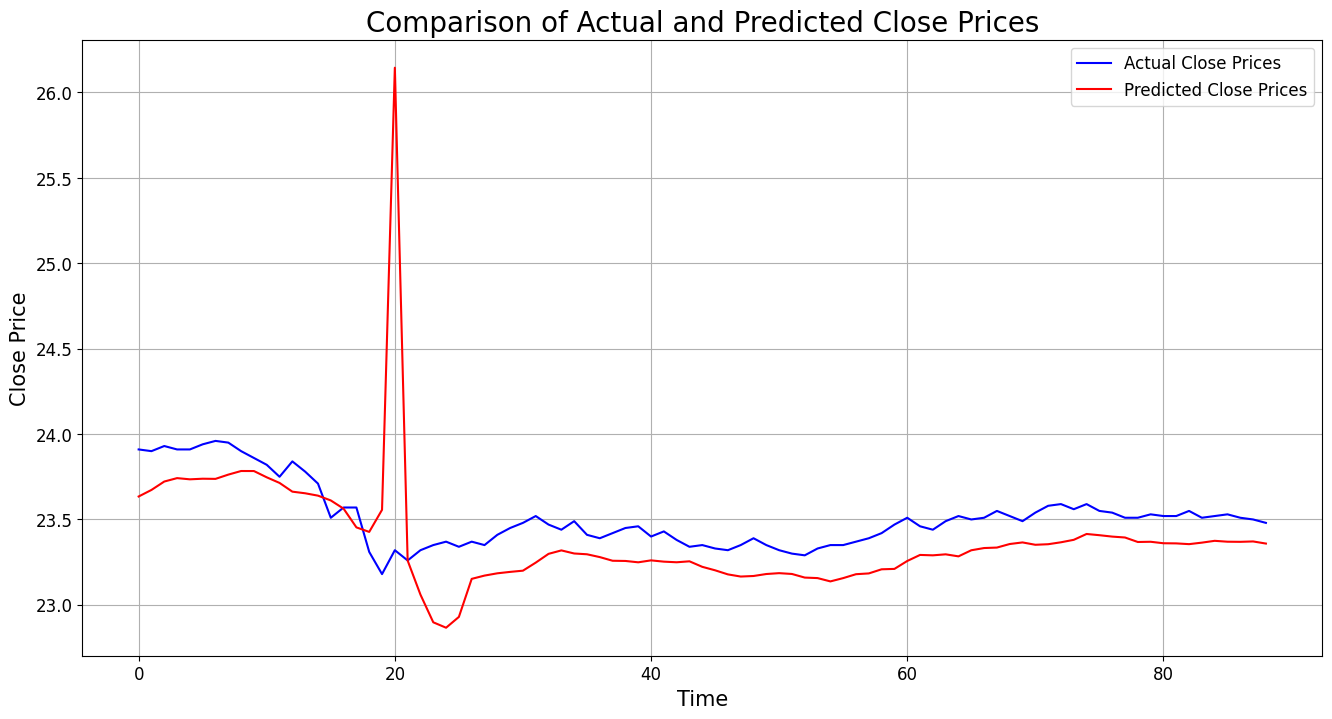

In [ ]:
data_length = len(y_test_denormalized2)
num_points = max(1, int(data_length * 0.01))

y_test_denormalized2 = y_test_denormalized2[:num_points]
y_pred_denormalized2 = y_pred_denormalized2[:num_points]

plt.figure(figsize=(16, 8))

plt.plot(y_test_denormalized2[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized2[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

TEST SET 3

In [ ]:
mae = mean_absolute_error(y_test_denormalized3, y_pred_denormalized3)
rmse = np.sqrt(mean_squared_error(y_test_denormalized3, y_pred_denormalized3))
mda = np.mean(np.abs((y_test_denormalized3 - y_pred_denormalized3) / y_test_denormalized3)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MDA: {mda:.2f}%")


MAE: 3512.92
RMSE: 9684.61
MDA: 26.92%


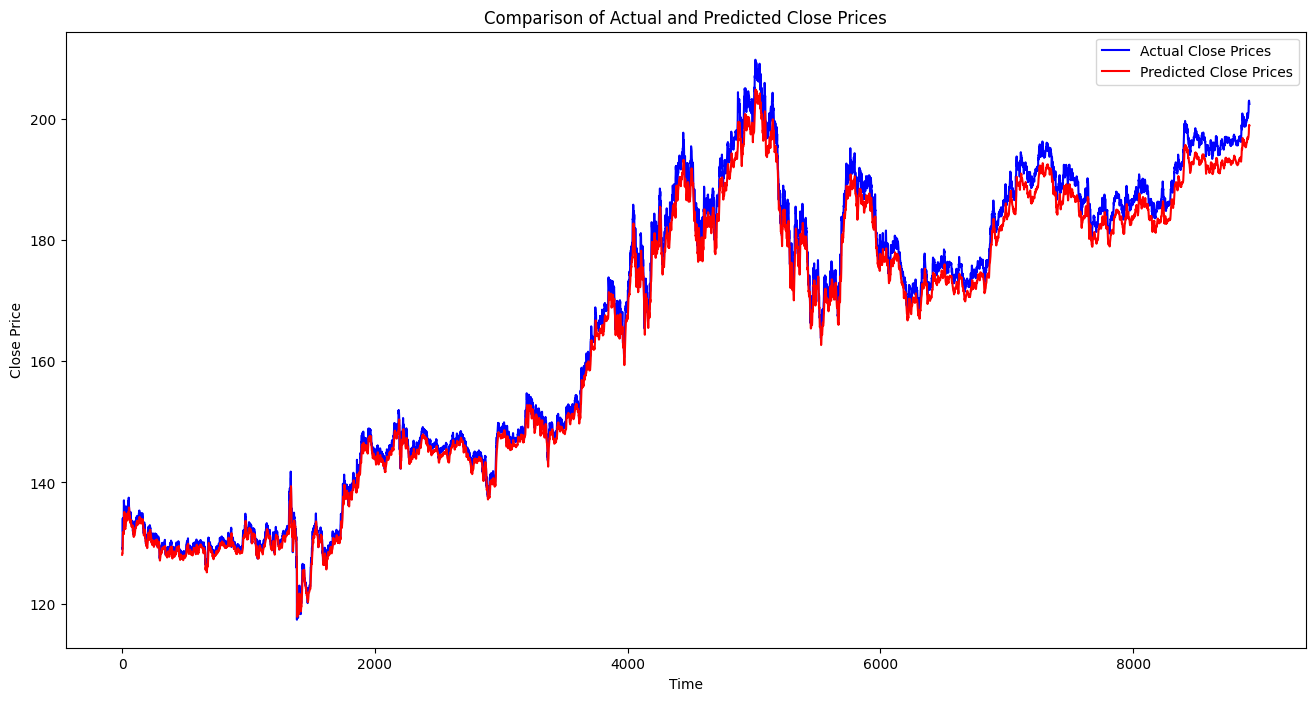

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_denormalized3[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized3[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

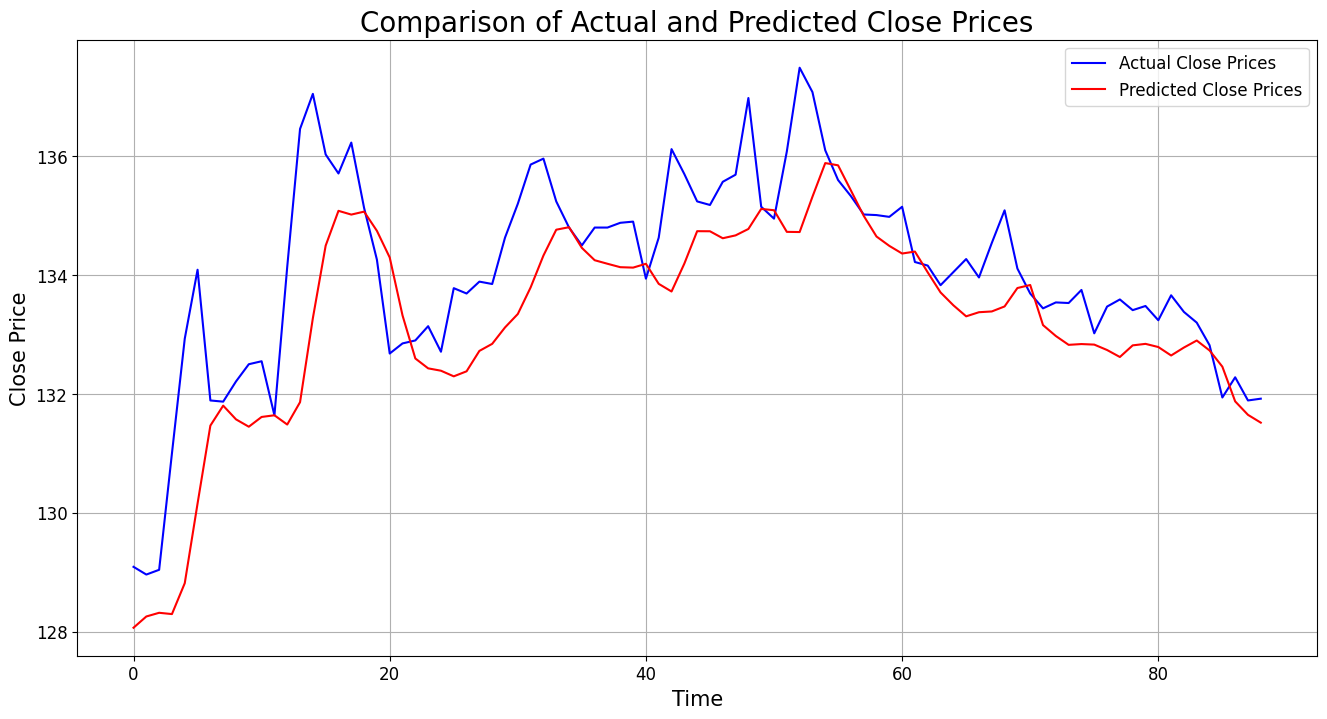

In [ ]:
data_length = len(y_test_denormalized3)
num_points = max(1, int(data_length * 0.01))

y_test_denormalized3 = y_test_denormalized3[:num_points]
y_pred_denormalized3 = y_pred_denormalized3[:num_points]

plt.figure(figsize=(16, 8))

plt.plot(y_test_denormalized3[:, 3], color='blue', label='Actual Close Prices')

plt.plot(y_pred_denormalized3[:, 3], color='red', label='Predicted Close Prices')

plt.title('Comparison of Actual and Predicted Close Prices', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()

CORRELATION MATRIX

In [ ]:
import seaborn as sns

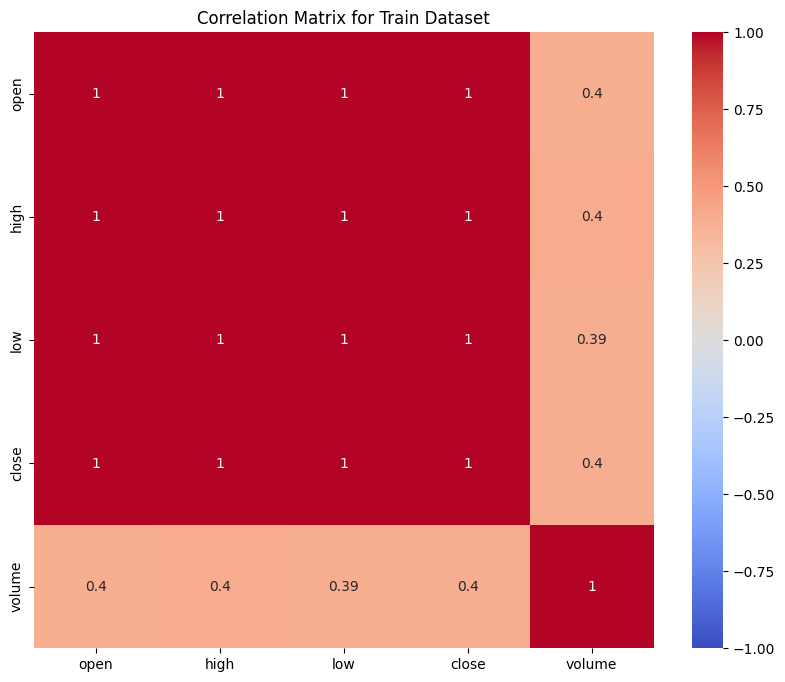

In [ ]:
correlation_matrix = train_dataset[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Train Dataset')
plt.show()